<a href="https://colab.research.google.com/github/aasthadawar02/TME_6015/blob/main/Assignment2_Hugging_Face_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install datasets
%pip install transformers

  Using cached datasets-2.14.6-py3-none-any.whl (493 kB)
  Using cached dill-0.3.7-py3-none-any.whl (115 kB)
  Using cached multiprocess-0.70.15-py310-none-any.whl (134 kB)
  Using cached huggingface_hub-0.18.0-py3-none-any.whl (301 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datasets import load_dataset
import torch
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification
from transformers import pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

In [4]:
dataset = load_dataset("lewtun/dog_food")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/2250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/750 [00:00<?, ? examples/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 2250
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 750
    })
})

In [7]:
class_names = dataset["train"].features["label"].names
class_names

['chicken', 'dog', 'muffin']

In [8]:
dataset=dataset.shuffle(seed=128)

In [10]:
x_test=[]
y_test=[]
for i in range(200):
  x_test.append(dataset["test"][i]["image"])
  y_test.append(dataset["test"][i]["label"])

In [11]:
checkpoint = "openai/clip-vit-large-patch14"
detector = pipeline(model=checkpoint, task="zero-shot-image-classification")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [12]:

model = AutoModelForZeroShotImageClassification.from_pretrained(checkpoint)
processor = AutoProcessor.from_pretrained(checkpoint)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [13]:
inputs = processor(images=x_test, text=class_names, return_tensors="pt", padding=True)

In [14]:
with torch.no_grad():
    outputs = model(**inputs)

In [15]:
y_pred_prob=outputs.logits_per_image.softmax(dim=-1).numpy().tolist()

In [16]:
y_pred=[np.argmax(i) for i in y_pred_prob]

In [17]:
accuracy_score(y_test, y_pred)*100

97.5

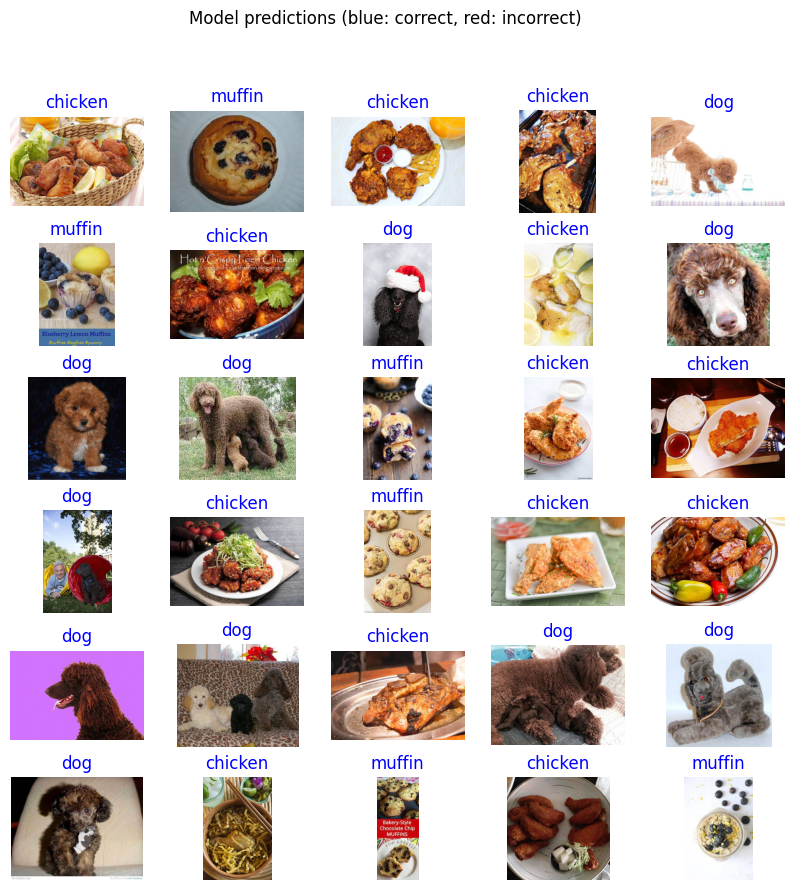

In [18]:
plt.figure(figsize=(10,10))
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(x_test[n])
    color = "blue" if y_pred[n] == y_test[n] else "red"
    plt.title(class_names[y_pred[n]], color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

In [19]:
f1_score_value = f1_score(y_pred, y_test, average="macro")
precision_score_value = precision_score(y_pred, y_test, average="macro")
recall_score_value = recall_score(y_pred, y_test, average="macro")

# Print the Results
print(f"F1-Score:{f1_score_value}")
print(f"Precision:{precision_score_value}")
print(f"Recall:{recall_score_value}")

F1-Score:0.9758441422044846
Precision:0.9768518518518517
Recall:0.9765258215962441


In [20]:
y_test_labels = list(map(lambda i: class_names[i], y_test))

In [21]:
y_pred_labels = list(map(lambda i: class_names[i], y_pred))

In [22]:
print(classification_report(y_test_labels,y_pred_labels))

              precision    recall  f1-score   support

     chicken       1.00      1.00      1.00        62
         dog       1.00      0.93      0.96        72
      muffin       0.93      1.00      0.96        66

    accuracy                           0.97       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.97      0.98       200



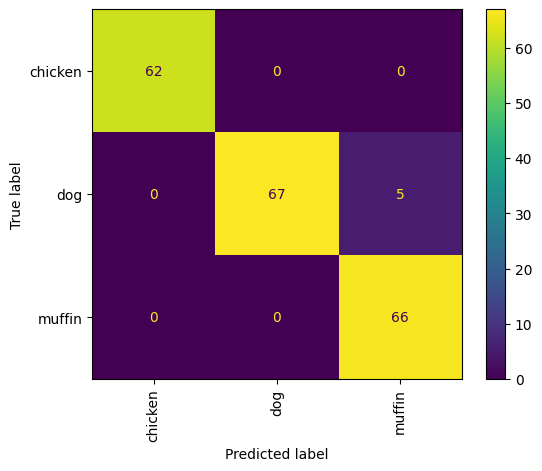

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names, xticks_rotation="vertical")
plt.show()